<a href="https://colab.research.google.com/github/its-vam/Gold_Price_Forecast/blob/main/main_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, plot_tree


In [2]:
#loading the data in pandas dataframe
gold_data = pd.read_csv('Gold_Price.csv')

In [3]:
#print first 5 rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
#rows and columns
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
gold_data.drop(['Date'], axis=1,inplace=True)

In [10]:
# correlation
correlation = gold_data.corr()

<Axes: >

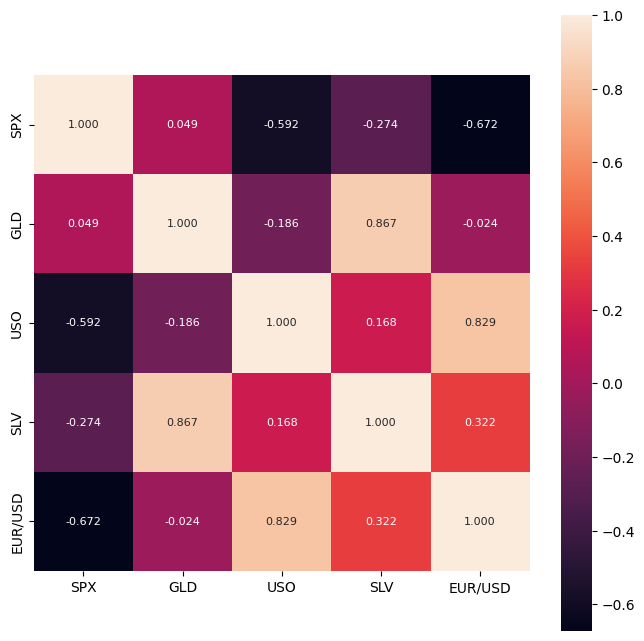

In [11]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation , cbar = True , square = True , fmt='.3f' , annot = True , annot_kws={'size':8})

In [12]:
# Drop rows with missing values
gold_data.dropna(inplace=True)

# Or fill missing values with mean
gold_data.fillna(gold_data.mean(), inplace=True)

In [13]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-14-84e84c017de2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

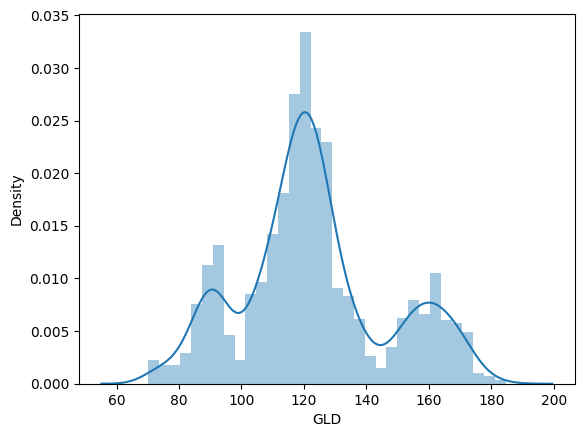

In [14]:
sns.distplot(gold_data['GLD'])

In [15]:
X = gold_data.drop(['GLD'], axis=1)
Y = gold_data['GLD']

In [16]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [17]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state = 2)

In [18]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [19]:
from sklearn.preprocessing import StandardScaler
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

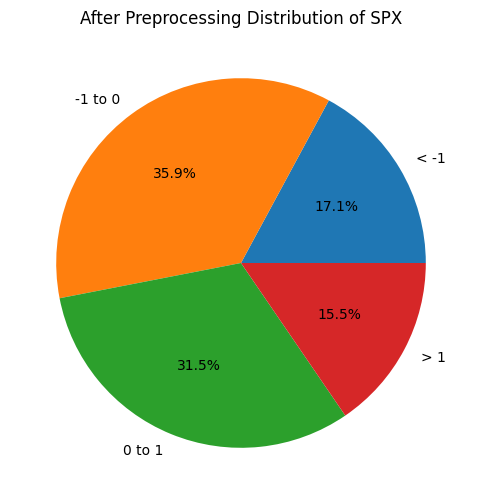

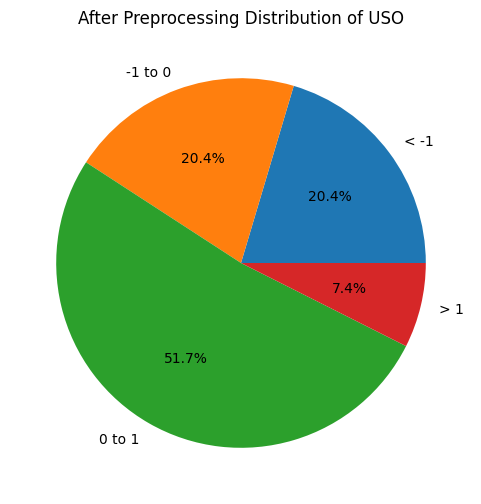

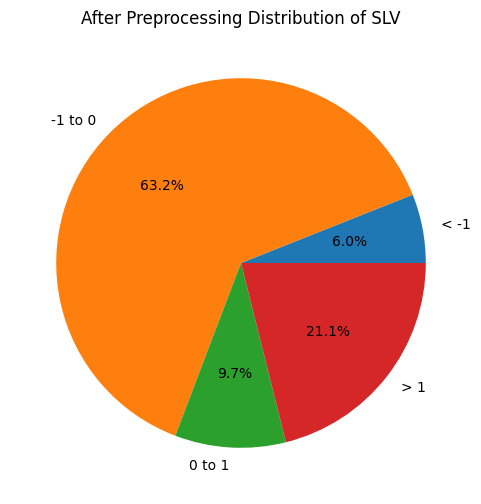

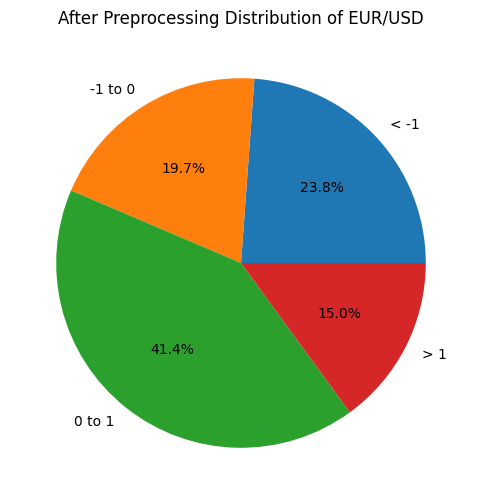

In [20]:
# Plotting pie charts for data distribution
def plot_pie_charts(data, title):
    ranges = [(-np.inf, -1), (-1, 0), (0, 1), (1, np.inf)]
    labels = ['< -1', '-1 to 0', '0 to 1', '> 1']
    for col in data.columns:
        counts = [data[(data[col] > r[0]) & (data[col] <= r[1])].shape[0] for r in ranges]
        plt.figure(figsize=(6, 6))
        plt.pie(counts, labels=labels, autopct='%1.1f%%')
        plt.title(f'{title} Distribution of {col}')
        plt.show()

plot_pie_charts(X_scaled_df, "After Preprocessing")


In [21]:
regressor.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [22]:
# Training a Decision Tree Regressor
regressor_dt = DecisionTreeRegressor(random_state=0)  # Initialize Decision Tree Regressor
regressor_dt.fit(X_train, Y_train)


DecisionTreeRegressor(random_state=0)

In [23]:
test_data_prediction = regressor.predict(X_test)

In [24]:
# Predicting on the test set
test_data_prediction_dt = regressor_dt.predict(X_test)

# Printing R Squared Error for Decision Tree
error_score_dt = metrics.r2_score(Y_test, test_data_prediction_dt)
print('R Squared Error:', error_score_dt)


R Squared Error: 0.9854190298916252


In [25]:
error_score = metrics.r2_score(Y_test , test_data_prediction)
print('R Squared Error (Random Forest ):', error_score)

R Squared Error (Random Forest ): 0.988702488354275


In [26]:
Y_test = list(Y_test)

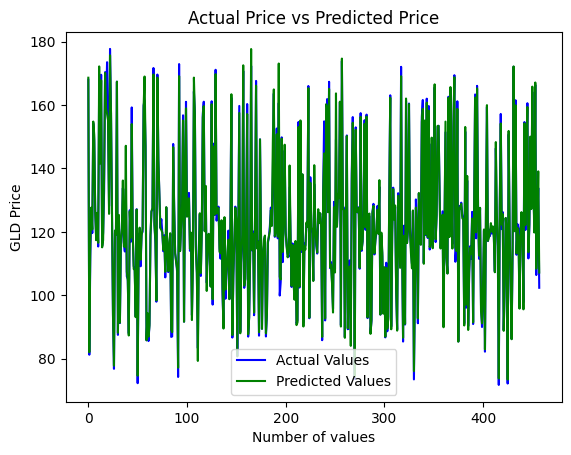

In [27]:
plt.plot(Y_test, color='blue', label ='Actual Values')
plt.plot(test_data_prediction , color = 'green', label = 'Predicted Values')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

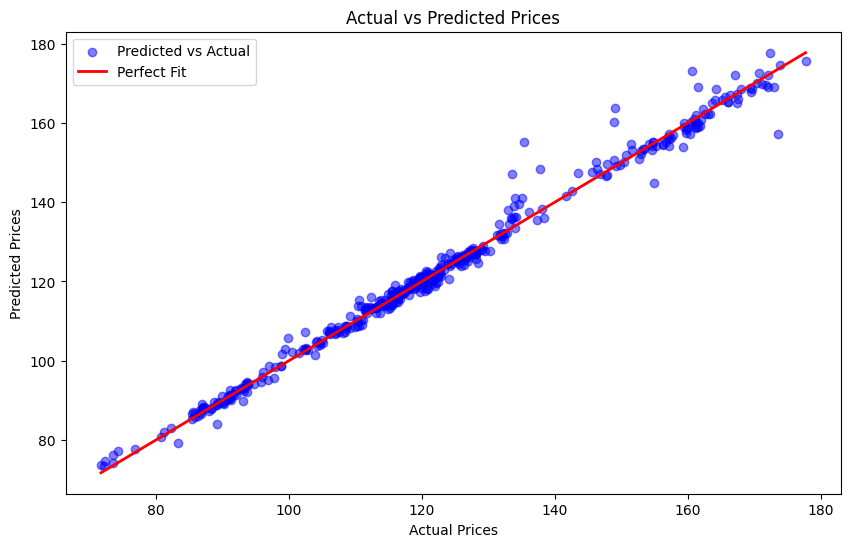

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, test_data_prediction, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [29]:
# Plotting the Decision Tree
#plt.figure(figsize=(10,10))
#plot_tree(regressor_dt, filled=True, feature_names=X.columns, fontsize=10)
#plt.title('Decision Tree Visualization')
#plt.show()


In [30]:
input_data=(1378.550049,72.349998,16.818001,1.486503)

#changing the input data to numpy
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting on 1 instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print('The Predcited price of Gold for the next month : ', prediction[0])


The Predcited price of Gold for the next month :  90.9793011400001


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [31]:

import pickle
filename = "gold_price_prediction_model.sav"
pickle.dump(regressor , open(filename,'wb'))
#loading. the saved model
loaded_model = pickle.load(open('gold_price_prediction_model.sav','rb'))

In [32]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00


In [33]:
#

In [34]:
%%writefile gold_price_app.py
import numpy as np
import pickle
import pandas as pd
import streamlit as st

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Loading the saved model
loaded_model = pickle.load(open('gold_price_prediction_model.sav', 'rb'))

# Creating a function for prediction
def gold_price_prediction(input_data):
    # Changing the input data to numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # Reshape the array as we are predicting on one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

    prediction = loaded_model.predict(input_data_reshaped)
    return prediction[0]

def main():
    # Giving a title
    st.title('Gold Price Prediction Web App')

    # Getting input data from user
    SPX = st.number_input("SPX")
    USO = st.number_input("USO")
    SLV = st.number_input("SLV")
    EUR_USD = st.number_input("EUR/USD")

    # Code for prediction
    price = ''

    # Creating a button for Prediction
    if st.button('Predict Gold Price'):
        price = gold_price_prediction([SPX, USO, SLV, EUR_USD])
        st.success(f'The Predicted Price: {price}$')

    # Displaying images
    st.subheader('Model Statistics:')
    st.image('111.png', caption='Actual Vs Predicted Values 1')
    st.image('112.png', caption='Actual Vs Predicted Values 1')

if __name__ == '__main__':
    main()


Writing gold_price_app.py


In [35]:
#!streamlit run gold_price_app.py

In [36]:
#from google.colab import files
#uploaded = files.upload()
!streamlit run gold_price_app.py &>/dev/null&

In [37]:
from pyngrok import ngrok

# Replace 'YOUR_NGROK_AUTHTOKEN' with your actual ngrok authtoken
ngrok.set_auth_token('2hdrajb6GPXNa3gMEDz2kpV1ODE_g6JGvDR2g9PSVhZLv7Sm')

# Terminate open tunnels if any
ngrok.kill()

# Start a new ngrok tunnel
public_url = ngrok.connect(addr='8501', proto='http')
print("Public URL:", public_url)




Public URL: NgrokTunnel: "https://e5e8-34-75-135-253.ngrok-free.app" -> "http://localhost:8501"


In [38]:
!pip install --upgrade google-cloud-storage
!pip install --upgrade google-cloud-ai-platform


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 2.7 MB/s eta 0:00:00
ERROR: Operation cancelled by user
ERROR: Could not find a version that satisfies the requirement google-cloud-ai-platform (from versions: none)
ERROR: No matching distribution found for google-cloud-ai-platform


In [39]:
from google.colab import auth
auth.authenticate_user()


MessageError: Error: credential propagation was unsuccessful